# Clustering Challenge

[Clustering](https://scikit-learn.org/stable/modules/clustering.html#) is an unsupervised machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (A, B, and C) into clusters.

Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

# Importing libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

# Custom colors

In [2]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
base_palette = ["#7fc97f", "#beaed4", "#fdc086", "#ffff99"]
base_cmap = colors.ListedColormap(base_palette)

# Loading the data

In [3]:
URL = "https://github.com/Kofoworola13/ml-basics/raw/master/challenges/data/clusters.csv"

data = pd.read_csv(URL)
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


The dataset is made up of the numerical features, `A`, `B` and `C`, with 1000 instances of each

# Scaling the data

The data is Standardized using StandardScaler, which is crucial for clustering algorithms as it ensures that features contribute equally to the distance measurements.


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()


scaled_data = scaler.fit_transform(data)
scaled_data

#scaler.fit(data)
#scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns)
#scaled_data.head()

array([[-1.28023682, -0.90040833, -1.17188057],
       [-2.06747134, -1.65782731, -1.12596332],
       [ 0.98702518,  0.39445706,  1.25205713],
       ...,
       [ 0.72746665,  0.20129238,  0.18270624],
       [-1.40017494, -1.24306375, -1.12211472],
       [ 0.71125444,  0.51754571,  0.60413726]])

# Clustering Models

**Steps involved in the Clustering**

* Determine the optimal number of clusters to be formed using Elbow and Dendogram methods.
* Clustering via [Agglomerative clustering](https://scikit-learn.org/stable/modules/clustering.html#)
* Examining the clusters formed via scatter plot.

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import pairwise_distances

# Elbow method to determine the optimal number of clusters

The Elbow Method is a technique used to determine the optimal number of clusters in a dataset for clustering algorithms like K-Means. It involves plotting the sum of squared distances (inertia) between data points and their cluster centroids against the number of clusters. The "elbow" of the curve, where the rate of decrease sharply changes, indicates the optimal number of clusters. This point represents a balance between having too many clusters (overfitting) and too few clusters (underfitting), providing a clear and practical choice for the number of clusters.

Elbow Method to determine the number of clusters to be formed:


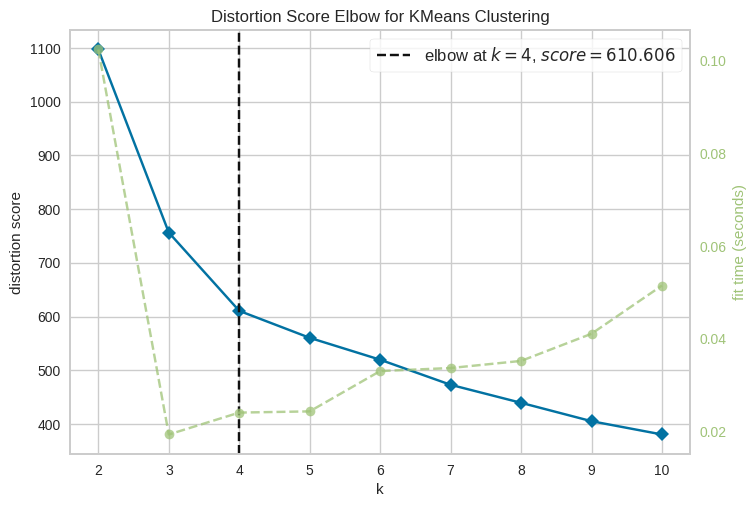

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(scaled_data)
Elbow_M.show()

The optimal number of clusters is identified as **4**

# Dendogram Method

The dendrogram method is commonly used in hierarchical clustering, including agglomerative clustering, to visualize the arrangement of clusters and help decide the number of clusters by identifying where to "cut" the dendrogram. A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering.

In [9]:
# Compute the linkage matrix
linked = linkage(scaled_data, method='ward')

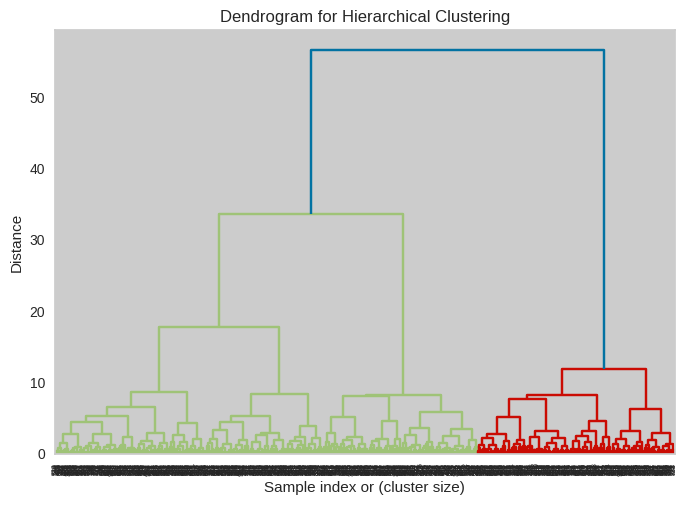

In [10]:
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

**Interpretation of the Dendrogram for Hierarchical Clustering**

1. **Vertical Axis (Distance):** The vertical axis represents the distance or dissimilarity between clusters. The greater the vertical distance, the more dissimilar the clusters are when they are merged.

2. **Horizontal Axis (Sample Index):** The horizontal axis represents the individual data points or clusters as they are grouped together.

3. **Cluster Formation:**
   - The leaves at the bottom represent individual data points or the smallest clusters.
   - As you move up the dendrogram, data points or smaller clusters are combined into larger clusters.
   - The height at which two clusters are merged represents the distance (or dissimilarity) between them.

4. **Cutting the Dendrogram:**
   - If you draw a horizontal line across the dendrogram (often referred to as "cutting the dendrogram"), the number of vertical lines the line intersects represents the number of clusters formed.
   - In this dendrogram, a reasonable cut could be made where the height is around 35-40, which would result in two distinct clusters.

5. **Two Main Clusters:**
   - The large vertical jump in the dendrogram indicates the presence of **two** primary clusters (the green and orange sections), with a significant dissimilarity between them.
   - Within these two main clusters, smaller sub-clusters are formed as the dendrogram branches out.

In summary, the dendrogram suggests that the data naturally divides into two main clusters, each of which can be further subdivided into smaller groups depending on the level of granularity desired.

# Explaining the difference in the optimal values gotten from the two approaches

* The KElbowVisualizer identified 4 as the optimal number of clusters. This suggests that when considering the balance between within-cluster variance and the number of clusters, 4 clusters provide a meaningful grouping of the data.

* The dendrogram, on the other hand, highlighted 2 as a primary cut-off point, suggesting that the data could also be grouped into 2 larger clusters.
This doesn't contradict the result from the KElbowVisualizer but rather complements it. The hierarchical clustering method, visualized by the dendrogram, starts by merging the closest points and forms a hierarchy of clusters. The large jump seen when the dendrogram merges the final two clusters indicates a significant difference between these two large groups, suggesting a broader view of the data structure.

* In practical terms, this means that the data has an inherent structure that can be explored at different levels. The choice of 2 or 4 clusters depends on the specific insights we seek to derive from the data. Both methods reinforce the idea that the dataset is structured and that meaningful groupings exist within it.

# Agglomerative Clustering

Agglomerative clustering is a hierarchical method that progressively merges data points until the desired number of clusters is formed.

In this model, I used 2 clusters, as suggested by the dendrogram analysis. However, you can explore different cluster values using the interactive widget below to see how the results change with custom settings.



In [11]:
# Fit Agglomerative Clustering and predict
agg_clustering = AgglomerativeClustering(n_clusters=2)

labels = agg_clustering.fit_predict(scaled_data)

In [12]:
# Convert labels to a NumPy array
if isinstance(labels, list):
    labels_np = np.array(labels)


In [13]:
# Add cluster labels to the original data
data['Cluster'] = labels

In [14]:
# Display the first few rows with the cluster labels
print(data.head())

          A         B         C  Cluster
0 -0.087492  0.398000  0.014275        1
1 -1.071705 -0.546473  0.072424        1
2  2.747075  2.012649  3.083964        0
3  3.217913  2.213772  4.260312        0
4 -0.607273  0.793914 -0.516091        1


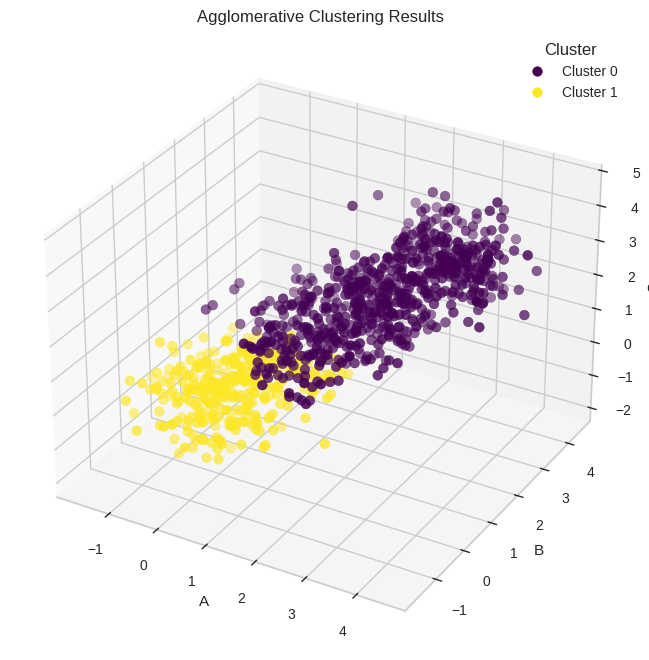

In [15]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['A'], data['B'], data['C'], c=data['Cluster'], cmap='viridis', s=50)
ax.set_title('Agglomerative Clustering Results')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

# Legend
handles, labels = scatter.legend_elements()
ax.legend(handles, [f'Cluster {i}' for i in range(4)], title='Cluster')

plt.show()

**Distribution of clustering**

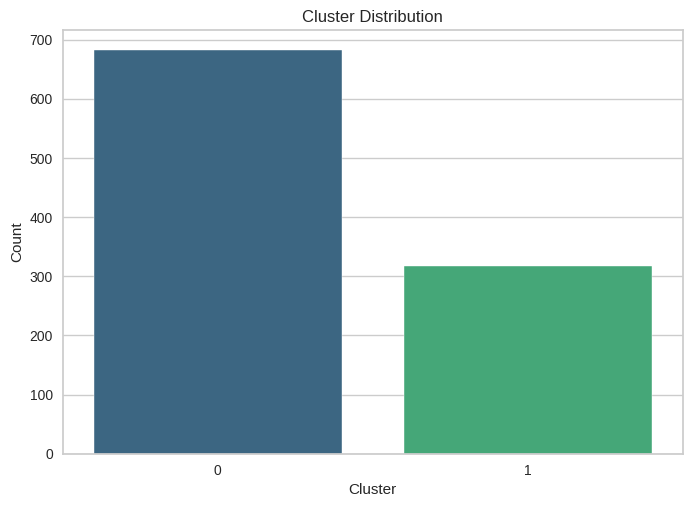

In [16]:
sns.countplot(x='Cluster', data=data, hue='Cluster', palette='viridis', legend=False)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

The clusters seem skewed.

# Conclusion

This sample clustering project demonstrates the application of Agglomerative Clustering to a 3D dataset. The analysis yielded four distinct clusters, each varying in size and distribution:

- **Cluster 0** emerged as the larger group, indicating a dominant pattern or common characteristics within the dataset.
- **Cluster 1** is smaller with little overlaps in cluster 0,  suggesting they represent similar but distinct subsets of the data.


The project showcases the steps involved in clustering, including scaling the data, determining the optimal number of clusters, and visualizing the results. Through this practice, key insights were gained into the dataset's structure, highlighting how clustering can uncover meaningful groupings within data.

# Bonus: Widgets

I have developed an interactive widget using the `ipywidgets` library to explore different clustering algorithms and their parameters, allowing users to visualize the results dynamically. In addition to the Agglomerative Clustering algorithm explored in this notebook, I have also included the [KMeans](https://scikit-learn.org/stable/modules/clustering.html#) algorithm, which partitions the dataset into *k* clusters (user-defined via the widget) of equal variance.

**Key Steps**:
- **Developed an interactive widget** using `ipywidgets` to allow users to select clustering algorithms and adjust parameters like the number of clusters.
- **Implemented Agglomerative Clustering** for hierarchical clustering of the dataset.
- **Integrated KMeans Clustering** to provide an alternative approach, partitioning the data into *k* clusters.
- **Visualized the clustering results** through 3D scatter plots and Seaborn countplots to show the distribution of clusters.
- **Ensured interactivity** by dynamically updating the plots based on user input, offering a hands-on approach to exploring clustering techniques.


In [17]:
#pip install ipywidgets

In [18]:
import ipywidgets as widgets
from ipywidgets import interact

In [19]:
# Function to perform clustering and plot results
def plot_clusters(algorithm, n_clusters):
    # Perform clustering based on selected algorithm
    if algorithm == 'KMeans':
        model = KMeans(n_clusters=n_clusters, n_init=10)
    elif algorithm == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters)

    labels = model.fit_predict(scaled_data)

    # Adjust palette and cmap to match the number of clusters
    palette = base_palette[:n_clusters]
    cmap = colors.ListedColormap(palette)

    # Create a figure with two subplots
    fig = plt.figure(figsize=(15, 6))

    # 3D scatter plot
    ax1 = fig.add_subplot(121, projection='3d')
    scatter = ax1.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=labels, cmap=cmap, s=50)
    ax1.set_title(f'{algorithm} Clustering with {n_clusters} Clusters')
    ax1.set_xlabel('A')
    ax1.set_ylabel('B')
    ax1.set_zlabel('C')

    # Seaborn countplot for cluster distribution
    ax2 = fig.add_subplot(122)
    sns.countplot(x=labels, palette=palette, ax=ax2, hue=labels)
    ax2.set_title('Cluster Distribution')
    ax2.set_xlabel('Cluster')
    ax2.set_ylabel('Count')

    plt.show()

# Create an interactive widget
interact(plot_clusters,
         algorithm=widgets.Dropdown(options=['KMeans', 'Agglomerative'], value='KMeans', description='Algorithm:'),
         n_clusters=widgets.IntSlider(min=2, max=4, step=1, value=2));

interactive(children=(Dropdown(description='Algorithm:', options=('KMeans', 'Agglomerative'), value='KMeans'),…